In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator

import scipy
from scipy import signal

from pathlib import Path
from openpyxl import load_workbook

from AuxFnc_SoundBoard import *


In [2]:
#Path settings
figureTargetFolder = Path(r'C:\Users\bfpcr\Desktop\SoundBoard_cfhw\temp_figures')
dataTargetFolder = Path(r"C:\Users\bfpcr\Desktop\SoundBoard_cfhw\Data")


#Global Viz settings
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

myColorPal = sns.color_palette("deep")
myColorPal_pastel = sns.color_palette("pastel")

default_fig_size = (6,4)
max_freq = 80 #kHz
min_freq = 0.2
gain_db_scale = (-5, 0.5) #dBs
fft_db_scale = (-200,10) #dBs
fft_noiseAw_db_scale = (-200,-100) #dBs

#Aux functions
def genpath(fileString, targetFolder = figureTargetFolder):
    return targetFolder / (fileString + '.pdf')

# Fig R1

<ipython-input-3-0c98a47e1609>:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-0c98a47e1609>:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-0c98a47e1609>:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-0c98a47e1609>:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


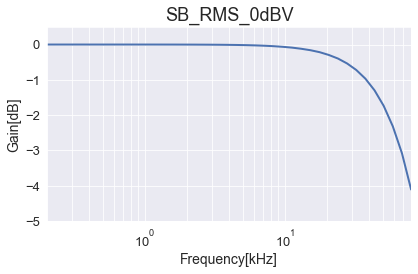

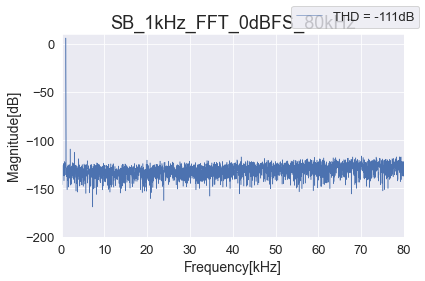

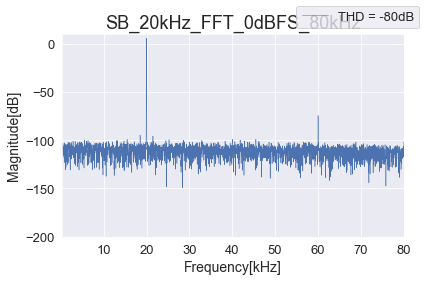

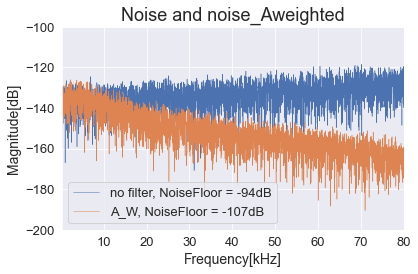

In [3]:

xlsxPath = dataTargetFolder / "Fig R1.xlsx"

sheetName = "SB_RMS_0dBV"
d = load_xlsx_sheet(xlsxPath, sheetName, col2 = 12)

## RMS
d['Y'] = d['Y'] - np.max(d['Y'])
fig, ax = plot_quick_XY(d, figsize = default_fig_size, 
    c = myColorPal[0],
    title = sheetName,
    xlabel = "Frequency[kHz]", 
    ylabel = "Gain[dB]",
    xlim = None, linewidth = 2)

ax.set_xscale('log', base=10)

ll = []
for iexp in (-1, 0, 1 , 2, 3, 4):
    ll.append(np.arange(0,10, 1) * 10**(iexp))
plt.xticks(np.concatenate(ll))
ax.set_xlim((min_freq, max_freq))
ax.set_ylim(gain_db_scale)
fig.savefig(genpath(xlsxPath.name + '_' + sheetName))
fig.show()

## 1kHz sine wave
sheetName = "SB_1kHz_FFT_0dBFS_80kHz"
d = load_xlsx_sheet(xlsxPath, sheetName)
fig, ax = plot_quick_XY(d, figsize = default_fig_size, 
    c = myColorPal[0],
    title = sheetName,
    xlabel = "Frequency[kHz]", 
    ylabel = "Magnitude[dB]",
    xlim = (0,80), label = "THD = -111dB")
fig.legend()
ax.set_ylim(fft_db_scale)
fig.savefig(genpath(xlsxPath.name + '_' + sheetName))
fig.show()

## 20kHz sine wave
sheetName = "SB_20kHz_FFT_0dBFS_80kHz"
d = load_xlsx_sheet(xlsxPath, sheetName)
fig, ax = plot_quick_XY(d, figsize = default_fig_size, 
    c = myColorPal[0],
    title = sheetName,
    xlabel = "Frequency[kHz]", 
    ylabel = "Magnitude[dB]",
    xlim = (min_freq,max_freq), label = "THD = -80dB")
fig.legend()
ax.set_ylim(fft_db_scale)
fig.savefig(genpath(xlsxPath.name + '_' + sheetName))
fig.show()

## Noise and Noise-Aweighted
d_noise = load_xlsx_sheet(xlsxPath, "SB_FFT_noise_80kHz")
d_noise_a_w = load_xlsx_sheet(xlsxPath, "SB_FFT_noise_Aweight_80kHz")
fig = plt.figure(figsize=default_fig_size, tight_layout=True)
ax = fig.add_subplot(1,1,1)
plt.plot(d_noise["X"]/1000, d_noise["Y"],
    linewidth = 0.5,
    c = myColorPal[0], label = 'no filter, NoiseFloor = -94dB')

plt.plot(d_noise_a_w["X"]/1000, d_noise_a_w["Y"],
    linewidth = 0.5,
    c = myColorPal[1], label = 'A_W, NoiseFloor = -107dB')

plt.title("Noise and noise_Aweighted")
plt.xlabel("Frequency[kHz]")
plt.ylabel("Magnitude[dB]")
plt.xlim([min_freq,max_freq])
plt.ylim(fft_noiseAw_db_scale)
plt.legend()
fig.savefig(genpath(xlsxPath.name + '_' + 'NoiseLevels'))
fig.show()



## Fig R2

['SB_THD+N_CHRL_-10dBFS', 'SB_THD+N_CHRL_-20dBFS', 'SB_THD+N_CHRL_-30dBFS', 'SB_THD+N_CHRL_-40dBFS', 'SB_THD+N_CHRL_0dBFS']
['SB_THD_CHRL_-10dBFS', 'SB_THD_CHRL_-20dBFS', 'SB_THD_CHRL_-30dBFS', 'SB_THD_CHRL_-40dBFS', 'SB_THD_CHRL_0dBFS']


<ipython-input-4-c1e57270c063>:75: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-c1e57270c063>:75: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


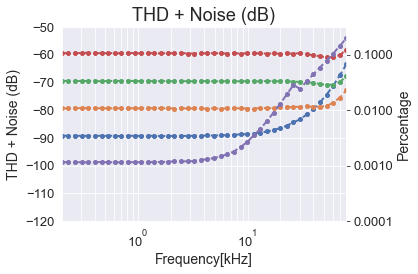

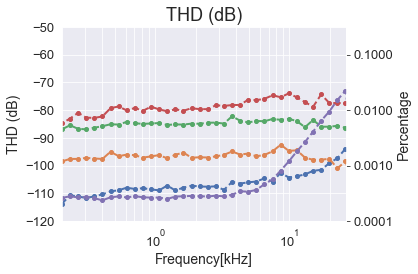

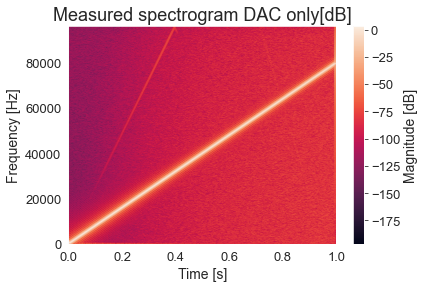

In [4]:
r2_data_path = dataTargetFolder / "Fig R2.xlsx"
availableSheets = load_workbook(r2_data_path, read_only=True, keep_links=False).sheetnames
availableSheets = [p for p in availableSheets if not any(word in p for word in 'Plots')]
noNoise = [p for p in availableSheets if not any(word in p for word in '_THD_')]
plusNoise = sorted([p for p in availableSheets if ('_THD+N_' in p)])
noNoise = sorted([p for p in availableSheets if ('_THD_' in p)])

print(plusNoise)
print(noNoise)

for ii in (1,2):

    if ii == 1:
        group = plusNoise
        labelString = "THD + Noise (dB)"
        xlim2set = (min_freq, max_freq)
        ylim2set = (-120,-50)

    elif ii == 2:
        group = noNoise
        labelString = "THD (dB)"
        xlim2set = (min_freq, max_freq/3)
        ylim2set = (-120,-50)


    fig = plt.figure(figsize=default_fig_size, tight_layout=True)
    ax = fig.add_subplot(1,1,1)
    for idb, sheet in enumerate(group):
        d = load_xlsx_sheet(r2_data_path, sheet, col2 = 1)
        ax.plot(d['X']/1000, d['Y'],
            linewidth = 2, 
            linestyle = '--',
            c = myColorPal[idb], 
            marker='o',markersize= 4,
            label = sheet)

        # d = load_xlsx_sheet(r2_data_path, sheet, col2 = 6)
        # ax.plot(d['X']/1000, d['Y'],
        #     linewidth = 2, 
        #     c = myColorPal_paster[idb], 
        #     marker='o',markersize= 4,
        #     label = sheet)


    plt.title(labelString)
    plt.xlabel("Frequency[kHz]")
    plt.ylabel(labelString)
    #plt.legend()

    ax.set_xscale('log', base=10)
    ax.set_ylim(ylim2set)
    ll = []
    for iexp in (-1, 0, 1 , 2, 3, 4):
        ll.append(np.arange(0,10, 1) * 10**(iexp))
    plt.xticks(np.concatenate(ll))
    ax.set_xlim(xlim2set)
    
    def thd_to_perc(x):
        return 10**(x/20) * 100

    def perc_to_thd(x):
        x = np.array(x).astype(float)
        near_zero = np.isclose(x, 0)
        x[near_zero] = -np.inf
        x[~near_zero] = (np.log10(x[~near_zero]/100)) * 20
        return x


    secax_y = ax.secondary_yaxis(
        'right', functions=(thd_to_perc, perc_to_thd))
    secax_y.set_ylabel('Percentage')
    secax_y.set_yticks((0.0001,0.001,0.01,0.1,1))

    fig.savefig(genpath(r2_data_path.name + '_' + sheet))
    fig.show()


## Chirp spectrogram (DAC ONLY)
chirpFile = dataTargetFolder / "Fig R2 chirp_SB.trc"
fs = 192000
wave_start_sample = 180000
d = load_trc_file(chirpFile, col2 = 1)
d = d['Y'].values[wave_start_sample:]
fig = plt.figure(figsize=default_fig_size)
ax = fig.add_subplot(1,1,1)

f, t, Sxx = signal.spectrogram(d*2, fs,
                               noverlap = int(10 / 1000. * fs) - (int(fs*.001)),
                               nperseg = int(10 / 1000. * fs),
                               mode = "magnitude",
                               scaling = "spectrum")
plt.pcolormesh(t, f, 20 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
cb= plt.colorbar()
cb.set_label('Magnitude [dB]')
plt.title('Measured spectrogram DAC only[dB]')
ax.set_xlim((0,1))
fig.savefig(genpath(r2_data_path.name + '_' + "linear_chirp_dac_only"))
plt.show()



## Figure R3 FFTs with amplifier (4Ohm load)

<ipython-input-5-062d29cec512>:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-5-062d29cec512>:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-5-062d29cec512>:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-5-062d29cec512>:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


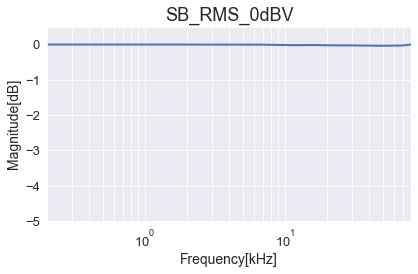

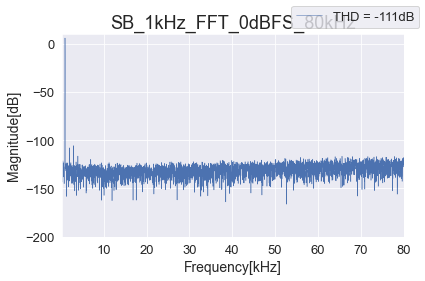

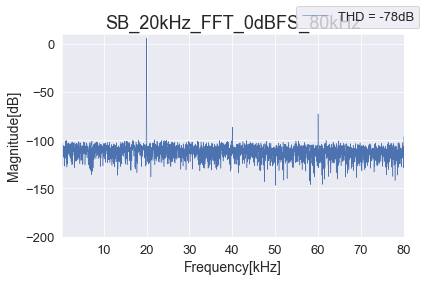

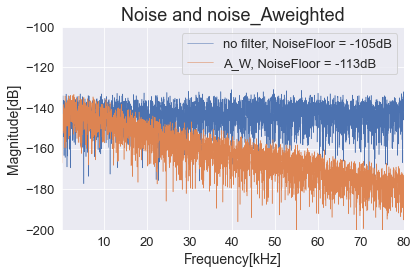

In [5]:

xlsxPath = dataTargetFolder / "Fig R3 SB_AMP_FFTs_2022_02_01_updated.xlsx"

sheetName = "SB_RMS_0dBV"
d = load_xlsx_sheet(xlsxPath, sheetName, col2 = 1)
d["Y"] = d["Y"] - np.max(d["Y"]) 
## RMS
fig, ax = plot_quick_XY(d, figsize = default_fig_size, 
    c = myColorPal[0],
    title = sheetName,
    xlabel = "Frequency[kHz]", 
    ylabel = "Magnitude[dB]",
    xlim = None, linewidth = 2)

ax.set_xscale('log', base=10)

ll = []
for iexp in (-1, 0, 1 , 2, 3, 4):
    ll.append(np.arange(0,10, 1) * 10**(iexp))
plt.xticks(np.concatenate(ll))
ax.set_xlim((min_freq, max_freq))
ax.set_ylim(gain_db_scale)
fig.savefig(genpath(xlsxPath.name + '_' + sheetName))
fig.show()

## 1kHz sine wave
sheetName = "SB_1kHz_FFT_0dBFS_80kHz"
d = load_xlsx_sheet(xlsxPath, sheetName)
fig, ax = plot_quick_XY(d, figsize = default_fig_size, 
    c = myColorPal[0],
    title = sheetName,
    xlabel = "Frequency[kHz]", 
    ylabel = "Magnitude[dB]",
    xlim = (min_freq,max_freq), label = "THD = -111dB")
fig.legend()
ax.set_ylim(fft_db_scale)
fig.savefig(genpath(xlsxPath.name + '_' + sheetName))
fig.show()

## 20kHz sine wave
sheetName = "SB_20kHz_FFT_0dBFS_80kHz"
d = load_xlsx_sheet(xlsxPath, sheetName)
fig, ax = plot_quick_XY(d, figsize = default_fig_size, 
    c = myColorPal[0],
    title = sheetName,
    xlabel = "Frequency[kHz]", 
    ylabel = "Magnitude[dB]",
    xlim = (min_freq,max_freq), label = "THD = -78dB")
fig.legend()
ax.set_ylim(fft_db_scale)
fig.savefig(genpath(xlsxPath.name + '_' + sheetName))
fig.show()

## Noise and Noise-Aweighted
d_noise = load_xlsx_sheet(xlsxPath, "SB_FFT_noise_80kHz")
d_noise_a_w = load_xlsx_sheet(xlsxPath, "SB_FFT_noise_Aweight_80kHz")
fig = plt.figure(figsize=default_fig_size, tight_layout=True)
ax = fig.add_subplot(1,1,1)
plt.plot(d_noise["X"]/1000, d_noise["Y"],
    linewidth = 0.5,
    c = myColorPal[0], label = 'no filter, NoiseFloor = -105dB')

plt.plot(d_noise_a_w["X"]/1000, d_noise_a_w["Y"],
    linewidth = 0.5,
    c = myColorPal[1], label = 'A_W, NoiseFloor = -113dB')

plt.title("Noise and noise_Aweighted")
plt.xlabel("Frequency[kHz]")
plt.ylabel("Magnitude[dB]")
plt.xlim([min_freq,max_freq])
plt.ylim(fft_noiseAw_db_scale)
plt.legend()
fig.savefig(genpath(xlsxPath.name + '_' + 'NoiseLevels'))
fig.show()



## Figure R4 sb + amp results - THDN + spectrogram
### Missing some data that artur will add soon




['SB_AMP_THD+N_CHR_-10dBFS_4Ohms', 'SB_AMP_THD+N_CHR_-20dBFS_4Ohms', 'SB_AMP_THD+N_CHR_-30dBFS_4Ohms', 'SB_AMP_THD+N_CHR_-40dBFS_4Ohms', 'SB_AMP_THD+N_CHR_0dBFS_4Ohms']


<ipython-input-6-bc0149f04917>:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


['SB_AMP_THD_CHR_-10dBFS_4Ohms', 'SB_AMP_THD_CHR_-20dBFS_4Ohms', 'SB_AMP_THD_CHR_-30dBFS_4Ohms', 'SB_AMP_THD_CHR_-40dBFS_4Ohms', 'SB_AMP_THD_CHR_0dBFS_4Ohms']


<ipython-input-6-bc0149f04917>:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


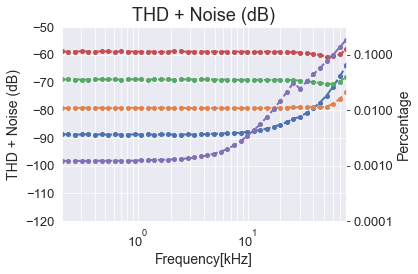

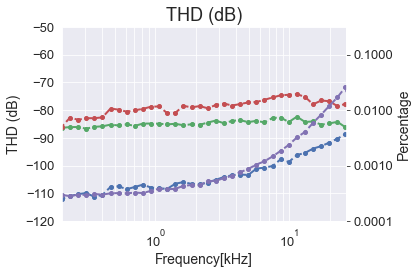

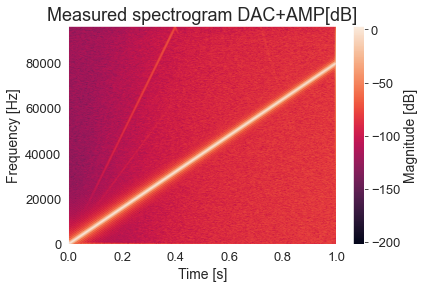

In [6]:
for ii in (1,2):
#if ii == 2:
    if ii == 1:
        r4_data_path = dataTargetFolder / "Fig R4 Data_SB_AMP_THD_2022_01_2831.xlsx"
        labelString = "THD + Noise (dB)"
        xlim2set = (min_freq, max_freq)
        ylim2set = (-120,-50)
        availableSheets = load_workbook(r4_data_path, read_only=True, keep_links=False).sheetnames
        group = sorted([p for p in availableSheets if (('_4Ohms' in p) and ('THD+N' in p))])

    elif ii == 2:
        r4_data_path = dataTargetFolder / "Fig R4 Data_SB_AMP_THD_2022_02_01.xlsx"
        labelString = "THD (dB)"
        xlim2set = (min_freq, max_freq/3)
        ylim2set = (-120,-50)
        availableSheets = load_workbook(r4_data_path, read_only=True, keep_links=False).sheetnames
        group = sorted([p for p in availableSheets if (('_4Ohms' in p) and ('THD_' in p))])

    print(group)

    fig = plt.figure(figsize=default_fig_size, tight_layout=True)
    ax = fig.add_subplot(1,1,1)
    for idb, sheet in enumerate(group):

        d = load_xlsx_sheet(r4_data_path, sheet, col2 = 1)
        ax.plot(d['X']/1000, d['Y'],
            linewidth = 2, 
            linestyle = '--',
            c = myColorPal[idb], 
            marker='o',markersize= 4,
            label = sheet)

        # d = load_xlsx_sheet(r4_data_path, sheet, col2 = 6)
        # ax.plot(d['X']/1000, d['Y'],
        #     linewidth = 2, 
        #     c = myColorPal_pastel[idb], 
        #     marker='o',markersize= 4,
        #     label = sheet)


    plt.title(labelString)
    plt.xlabel("Frequency[kHz]")
    plt.ylabel(labelString)
    #plt.legend()

    ax.set_xscale('log', base=10)
    ax.set_ylim(ylim2set)
    ll = []
    for iexp in (-1, 0, 1 , 2, 3, 4):
        ll.append(np.arange(0,10, 1) * 10**(iexp))
    plt.xticks(np.concatenate(ll))
    ax.set_xlim(xlim2set)
    
    def thd_to_perc(x):
        return 10**(x/20) * 100

    def perc_to_thd(x):
        x = np.array(x).astype(float)
        near_zero = np.isclose(x, 0)
        x[near_zero] = -np.inf
        x[~near_zero] = (np.log10(x[~near_zero]/100)) * 20
        return x


    secax_y = ax.secondary_yaxis(
        'right', functions=(thd_to_perc, perc_to_thd))
    secax_y.set_ylabel('Percentage')
    secax_y.set_yticks((0.0001,0.001,0.01,0.1,1))

    fig.show()




## Chirp spectrogram (DAC + AMP)

chirpFile = dataTargetFolder / "Fig R2 chirp_SB_AMP.trc"
fs = 192000
wave_start_sample = 184500
d = load_trc_file(chirpFile, col2 = 1)
d = d['Y'].values[wave_start_sample:]
fig = plt.figure(figsize=default_fig_size)
ax = fig.add_subplot(1,1,1)

f, t, Sxx = signal.spectrogram(d*2, fs,
                               noverlap = int(10 / 1000. * fs) - (int(fs*.001)),
                               nperseg = int(10 / 1000. * fs),
                               mode = "magnitude",
                               scaling = "spectrum")
plt.pcolormesh(t, f, 20 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
cb= plt.colorbar()
cb.set_label('Magnitude [dB]')
plt.title('Measured spectrogram DAC+AMP[dB]')
ax.set_xlim((0,1))

plt.show()

## Fig R5 Sweep with speaker

<ipython-input-7-2d979b0503f5>:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-2d979b0503f5>:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


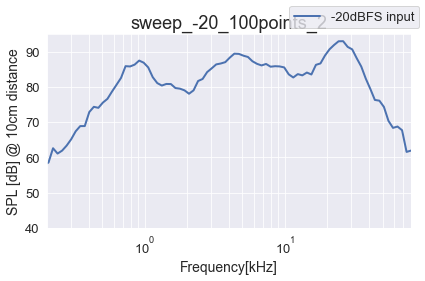

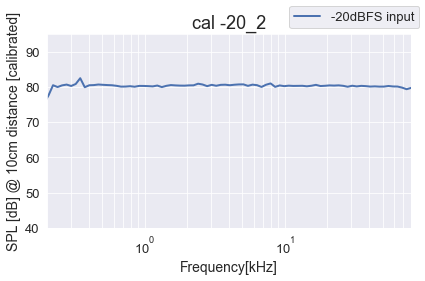

In [7]:
sweep_path = dataTargetFolder / "Fig R5 sweep_02_08.xlsx"
sheetName = 'sweep_-20_100points_2'
d = load_xlsx_sheet(sweep_path, skiprows = 15, col1 = 0, col2 = 11, sheetName=sheetName)
fig, ax = plot_quick_XY(d, figsize = default_fig_size, 
    c = myColorPal[0],
    title = sheetName,
    xlabel = "Frequency[kHz]", 
    ylabel = "SPL [dB] @ 10cm distance",
    xlim = (0,80), label = "-20dBFS input", linewidth= 2)
fig.legend()
ax.set_ylim((40,95))
ax.set_xscale('log', base=10)
ll = []
for iexp in (-1, 0, 1 , 2, 3, 4):
    ll.append(np.arange(0,10, 1) * 10**(iexp))
plt.xticks(np.concatenate(ll))
ax.set_xlim(min_freq, max_freq)
fig.savefig(genpath(sweep_path.name + '_' + sheetName))
fig.show()



sweep_path = dataTargetFolder / "Fig R5 sweep_02_08.xlsx"
sheetName = 'cal -20_2'
d = load_xlsx_sheet(sweep_path, skiprows = 15, col1 = 0, col2 = 11, sheetName=sheetName)
fig, ax = plot_quick_XY(d, figsize = default_fig_size, 
    c = myColorPal[0],
    title = sheetName,
    xlabel = "Frequency[kHz]", 
    ylabel = "SPL [dB] @ 10cm distance [calibrated]",
    xlim = (0,80), label = "-20dBFS input", linewidth= 2)
fig.legend()
ax.set_ylim((40,95))

ax.set_xscale('log', base=10)
ll = []
for iexp in (-1, 0, 1 , 2, 3, 4):
    ll.append(np.arange(0,10, 1) * 10**(iexp))
plt.xticks(np.concatenate(ll))
ax.set_xlim(min_freq, max_freq)

fig.savefig(genpath(sweep_path.name + '_' + sheetName))
fig.show()

## Fig R6 Latency

<ipython-input-8-53904fe2dc04>:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


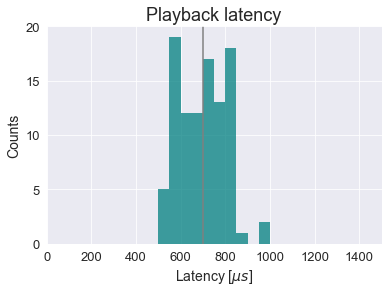

In [8]:
latencyData_path = dataTargetFolder / "Fig R6 Latency.xlsx"
lat_raw_data = load_xlsx_sheet(latencyData_path, skiprows = 0, col1 = 0, col2 = 1, sheetName='Sheet1')
fig = plt.figure(figsize= default_fig_size)
ax = fig.add_subplot(1,1,1)
sns.histplot(data = lat_raw_data["Y"], discrete=False, bins = np.arange(0, 1500,50),
             color='teal', edgecolor='none')

plt.vlines(np.median(lat_raw_data["Y"]), 0, 20, colors='gray')
ax.set_ylabel('Counts')
ax.set_xlabel(r'Latency [$\mu s$]')
ax.set_ylim((0, 20))
ax.set_xlim((0,1500))
ax.set_title('Playback latency')
ax.set_yticks(np.arange(0,25,5))
fig.savefig(genpath(latencyData_path.name + '_' + 'PlaybackLatency'))

fig.show()

## Bird Chirp

<ipython-input-9-1ed97271fde7>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, chirp = read(dataTargetFolder / "SongBirdData" / "song_k19049_44586.23662704_1_25_6_34_22_01.wav")


186103


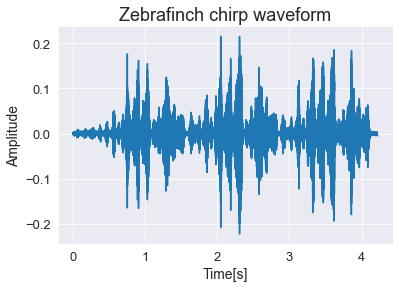

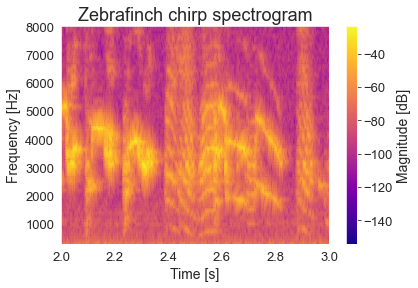

In [9]:
from scipy.io.wavfile import read

fs, chirp = read(dataTargetFolder / "SongBirdData" / "song_k19049_44586.23662704_1_25_6_34_22_01.wav")
chirp = chirp / 32768.0
fig = plt.figure(figsize=default_fig_size)
print(chirp.shape[0])
plt.plot(np.arange(0, chirp.shape[0]/fs, 1/fs), chirp)
plt.title('Zebrafinch chirp waveform')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.show()


fig = plt.figure(figsize=default_fig_size)
ax = fig.add_subplot(1,1,1)
FFTWin_ms = 10
f, t, Sxx = signal.spectrogram(chirp, fs,
                               noverlap = int(FFTWin_ms / 1000. * fs) - (int(fs*.001)),
                               nperseg = int(FFTWin_ms / 1000. * fs),
                               mode = "magnitude",
                               scaling = "spectrum")
                            
plt.pcolormesh(t, f, 20 * np.log10(Sxx), shading='gouraud', cmap = 'plasma', snap = True)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
cb= plt.colorbar()
cb.set_label('Magnitude [dB]')
plt.title('Zebrafinch chirp spectrogram')
plt.ylim(300, 8000)
plt.xlim(2,3)
plt.show()